In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("california_housing_train.csv")
print("Representation of the data: ")
df


Representation of the data: 


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800


In [ ]:
df.corr()['housing_median_age'] #for a specific feature

#using df.corr() for a correlation matrix
# df.corr() #for the correlation 
# plt.scatter(df.housing_median_age,df.total_rooms)

longitude            -0.114250
latitude              0.016454
housing_median_age    1.000000
total_rooms          -0.360984
total_bedrooms       -0.320434
population           -0.295890
households           -0.302754
median_income        -0.115932
median_house_value    0.106758
Name: housing_median_age, dtype: float64

In [ ]:
bedroom=df['total_bedrooms']
df=df.drop(['longitude','latitude','housing_median_age','median_income','median_house_value','total_bedrooms'],axis=1)
df

,total_rooms,population,households,bedrooms
0,5612,1015,472,1283
1,7650,1129,463,1901
2,720,333,117,174
3,1501,515,226,337
4,1454,624,262,326
...,...,...,...,...
16995,2217,907,369,394
16996,2349,1194,465,528
16997,2677,1244,456,531
16998,2672,1298,478,552


In [150]:
df.corr()['bedrooms']

total_rooms    0.928403
population     0.881169
households     0.980920
bedrooms       1.000000
Name: bedrooms, dtype: float64

Text(0, 0.5, 'BedRooms')

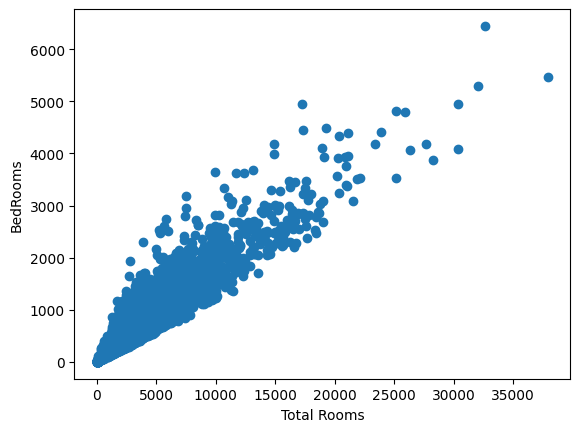

In [95]:
plt.scatter(df.total_rooms,df.bedrooms)
plt.xlabel("Total Rooms")
plt.ylabel("BedRooms")

Text(0, 0.5, 'BedRooms')

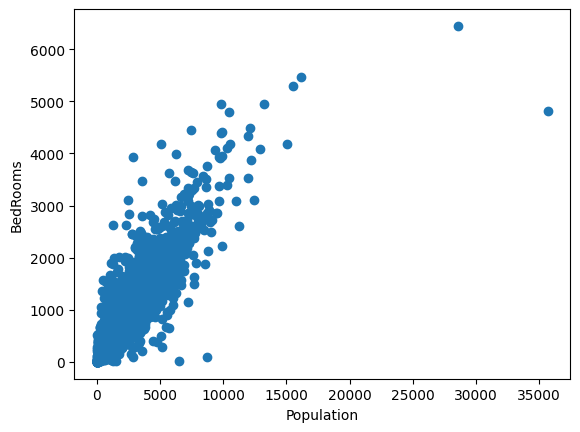

In [94]:
plt.scatter(df.population,df.bedrooms)
plt.xlabel("Population")
plt.ylabel("BedRooms")

Text(0, 0.5, 'BedRooms')

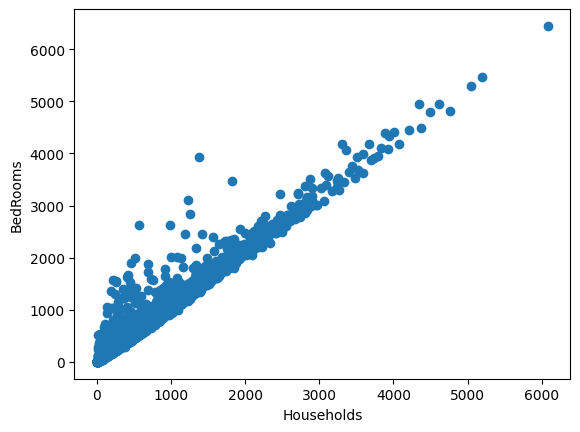

In [98]:
plt.scatter(df.households,df.bedrooms)
plt.xlabel("Households")
plt.ylabel("BedRooms")

In [ ]:
'''we want to prove that Bedrooms is some linear function of Total Rooms, Population and Households'''
#we start by comverting it tonumpy
df_np=df.to_numpy() #converting a pandas df to a numpy shape
df_np.shape #to access dimensions of the data

(17000, 4)

In [110]:
X_train,Y_train=df_np[:,:3],df_np[:,-1]
X_train


array([[5612, 1015,  472],
       [7650, 1129,  463],
       [ 720,  333,  117],
       ...,
       [2677, 1244,  456],
       [2672, 1298,  478],
       [1820,  806,  270]], shape=(17000, 3))

In [111]:
Y_train

array([1283, 1901,  174, ...,  531,  552,  300], shape=(17000,))

In [ ]:
'''using sklearn to see the standard method on how its done'''
from sklearn.linear_model import LinearRegression
sklearn_model=LinearRegression().fit(X_train,Y_train)
Y_predictions=sklearn_model.predict(X_train)
Y_predictions #returns a np_array of values

array([631.82986004, 693.11956219, 130.849378  , ..., 502.56126019,
       522.07260277, 304.4499167 ], shape=(17000,))

In [115]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(Y_predictions,Y_train),mean_squared_error(Y_predictions,Y_train)

(39.672217650706635, 5650.631822167879)

In [118]:
predicted_df=pd.DataFrame({'Population: ':df['population'],
                           'Households: ':df['households'],
                           'Total_Rooms': df['total_rooms'],
                           'Total_Bedrooms':df['bedrooms'],
                           "Bedroom Predictions": Y_predictions})
predicted_df
'''One thing we can analyse from this is that the model does trash predictions from the start but towards the end it gets very accurate'''

'One thing we can analyse from this is that the model does trash predictions from the start but towards the end it gets very accurate'

In [119]:
'''Assuming our function total_bedrooms is a linear function of the three categories: population, households and total_rooms'''
'''we can get a function in terms of y as: y[i]= alpha + beta1*population[i]+beta2*households[i]+beta3*total_rooms[i]+error'''
#in terms of X and Y it will be:
'''Generally: y[i]=alpha+ (beta1*x_1[i]) + beta2*x_2[i] + beta3*x_3[i] + error'''
# SO our prediction model will be: (^ meants hat representing the prediction model)
'''y^[i]= alpha^ + (beta_1^ * x_1[i]) + (beta_2^ * x_2[i]) + (beta_3^ * x_3[i])'''
#the learnable parameters here are: alpha^, beta_1^, beta_2^ and beta_3^ ....

'y^[i]= alpha^ + (beta_1^ * x_1[i]) + (beta_2^ * x_2[i]) + (beta_3^ * x_3[i])'

In [124]:
def get_predictions(model, X): 
    '''# Obtain Predictions for the given model and inputs\n
    The model here is a np.array of floats with p parameters (where p-1 are from input where the alpha term is not included) \n
    X is a np.array with shape (n,p-1) of inputs
    # returns: (y^) np.array of floats with shape (n,) '''
    
    (n,p_minus_one)=X.shape
    p=p_minus_one+1
    new_X=np.ones(shape=(n,p))
    new_X[:,1:]=X
    
    #performing and returning the dot product:
    return np.dot(new_X,model)
test_model=np.array([1,2,1,4])
get_predictions(test_model,X_train).shape


(17000,)

In [164]:
predicted_df['random_prediction']=get_predictions(test_model,X_train)
predicted_df
#testing the model on the current(random) predictions
mean_absolute_error(predicted_df['random_prediction'], Y_train)


8183.379705882353

In [ ]:
from numpy.linalg import inv
def get_best_model(X,Y):
    '''Works similar to np.fit...\n
    Y is a np.array with shape (n) \n
    X is a np.array with shape (n,p-1) of inputs \n
    returns: (y^) np.array of floats with shape (n,)#'''

    (n,p_minus_one)=X.shape
    p=p_minus_one+1
    new_X=np.ones(shape=(n,p))
    new_X[:,1:]=X

    #core math lies here
    '''w=(X^TX)^-1 X^Ty'''
    #this is derived from MSE formula with evaluation for Gradiient=0 and solving for W
    dot_prod=np.dot(new_X.T, new_X)
    inverse_dp=inv(dot_prod)
    XT_dp=np.dot(inverse_dp,new_X.T)
    ans=np.dot(XT_dp,Y)
    #in one line: np.dot(np.dot(inv(np.dot(new_X.T, new_X)), new_X.T), y)
    return ans

best_model = get_best_model(X_train, Y_train)
alpha,b1,b2,b3=best_model
predicted_df['Closed_form_model_Predictions'] = get_predictions(best_model, X_train)
predicted_df

,Population:,Households:,Total_Rooms,Total_Bedrooms,ScikitLearn_Predictions,random_prediction,Closed_form_model_Predictions
0,1015,472,5612,1283,631.829860,14128.0,631.829860
1,1129,463,7650,1901,693.119562,18282.0,693.119562
2,333,117,720,174,130.849378,2242.0,130.849378
3,515,226,1501,337,259.462982,4422.0,259.462982
4,624,262,1454,326,289.315311,4581.0,289.315311
...,...,...,...,...,...,...,...
16995,907,369,2217,394,412.047168,6818.0,412.047168
16996,1194,465,2349,528,501.086730,7753.0,501.086730
16997,1244,456,2677,531,502.561260,8423.0,502.561260
16998,1298,478,2672,552,522.072603,8555.0,522.072603


In [ ]:
mean_absolute_error(predicted_df['Closed_form_model_Predictions'], Y_train), mean_squared_error(predicted_df['Closed_form_model_Predictions'], Y_train)
#from8183

(39.67221765070642, 5650.631822167878)

Text(0, 0.5, 'Bedrooms (Black for Model, Red for Actual)')

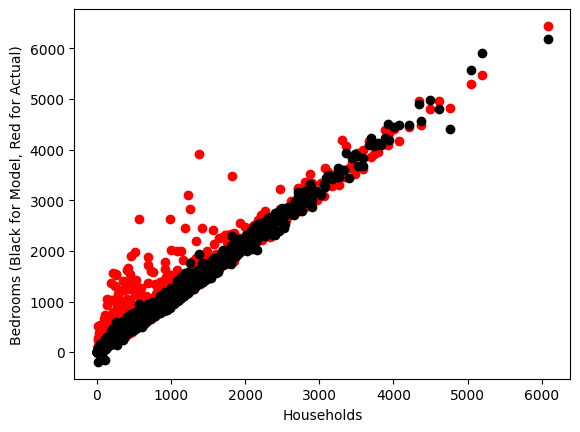

In [180]:
plt.scatter(predicted_df['Households: '],predicted_df['Total_Bedrooms'],color="red")

plt.scatter(predicted_df['Households: '],predicted_df['Closed_form_model_Predictions'],color="Black")
plt.xlabel("Households")
plt.ylabel("Bedrooms (Black for Model, Red for Actual)")

In [155]:
print('''Conclusions: Based on the correlation matrix, we saw that Household (0.980) had the highest correlations, 
      Followed By total rooms (0.928) and finally the population(0.88). ''')
df.corr()['bedrooms']


Conclusions: Based on the correlation matrix, we saw that Household (0.980) had the highest correlations, 
      Followed By total rooms (0.928) and finally the population(0.88). 


total_rooms    0.928403
population     0.881169
households     0.980920
bedrooms       1.000000
Name: bedrooms, dtype: float64

In [156]:
print('''This reflects in our models predictions for the weights and bias of the model as ''')
print(f"Alpha: {alpha:.4f}, Beta1(Total Rooms): {b1:.4f}, Beta2(Population): {b2:.4f}, Beta3(Households): {b3:.4f}")

This reflects in our models predictions for the weights and bias of the model as 
Alpha: 1.5497, Beta1(Total Rooms): 0.0362, Beta2(Population): -0.0325, Beta3(Households): 0.9748


In [ ]:
print("Hence we can say that our model has done a good job in predicting the number of bedrooms for this dataset. ")


Hence we can say that our model has done a good job in predicting the number of bedrooms for this dataset. 


In [182]:
print("It has achieved a Mean absolute error of 39.6722 on this dataset...") 

It has achieved a Mean absolute error of 39.6722 on this dataset...
